In [1]:
#importing libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv('mobiles_cleaned.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#preview of data
df.head()

,mobile_name,brand,price,rating,5g,nfc,ir_blaster,processor_brand,processor_name,num_cores,processor_speed,ram,memory,battery_capacity,fast_charging_capacity,Fast_charging,screen_size,resolution_width,resolution_height,refresh_rate,Punch_Hole,Notch,primary_camera,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,Extra_storage(GB),os_name,os_version
0,OPPO Reno 11,oppo,29990,4.70,True,True,True,Dimensity,Dimensity 8200,8,3.10,8.0,256.0,4800.0,67.0,True,6.70,1080.0,2412.0,120.0,True,False,50.0,32,3,1,False,NaN,Android,14.0
1,Poco X6 Pro 5G,poco,19999,4.50,True,True,True,Dimensity,Dimensity 8300 Ultra,8,3.35,12.0,256.0,5500.0,90.0,True,6.67,1220.0,2712.0,120.0,True,False,64.0,16,3,1,False,NaN,Android,14.0
2,Xiaomi Redmi Note 13 Pro Plus,xiaomi,31999,4.35,True,True,True,Dimensity,Dimensity 7200 Ultra,8,2.80,8.0,256.0,5000.0,120.0,True,6.67,1220.0,2712.0,120.0,True,False,200.0,16,3,1,False,NaN,Android,13.0
3,OPPO Reno 11 Pro,oppo,40990,4.75,True,True,True,Dimensity,Dimensity 8200,8,3.10,12.0,256.0,4600.0,80.0,True,6.74,1240.0,2772.0,120.0,True,False,50.0,32,3,1,False,NaN,Android,14.0
4,Xiaomi Redmi Note 13 Pro Max 5G,xiaomi,33999,4.00,True,True,True,Snapdragon,Snapdragon 7 Gen1,8,2.40,12.0,256.0,5200.0,120.0,True,6.67,1220.0,2712.0,144.0,True,False,200.0,32,3,1,False,NaN,Android,13.0


In [5]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mobile_name              1954 non-null   object 
 1   brand                    1954 non-null   object 
 2   price                    1954 non-null   int64  
 3   rating                   1855 non-null   float64
 4   5g                       1954 non-null   bool   
 5   nfc                      1954 non-null   bool   
 6   ir_blaster               1954 non-null   bool   
 7   processor_brand          1954 non-null   object 
 8   processor_name           1911 non-null   object 
 9   num_cores                1954 non-null   int64  
 10  processor_speed          1836 non-null   float64
 11  ram                      1954 non-null   float64
 12  memory                   1954 non-null   float64
 13  battery_capacity         1940 non-null   float64
 14  fast_charging_capacity  

#### Analysing Data to decide how we will fill the null values 

**Rating**

In [8]:
df['rating'].describe()

count    1855.000000
mean        4.153747
std         0.383173
min         3.000000
25%         4.000000
50%         4.200000
75%         4.450000
max         4.750000
Name: rating, dtype: float64

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2293597686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

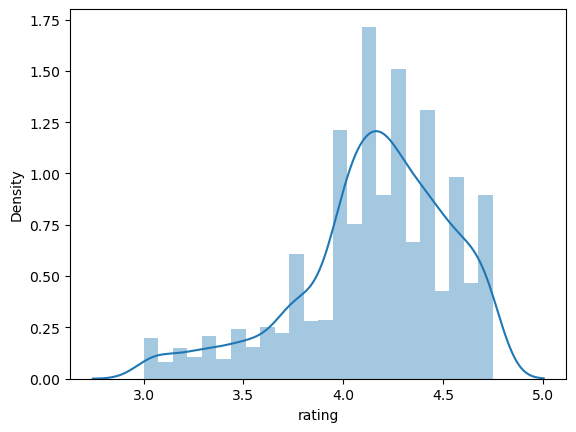

In [9]:
sns.distplot(df['rating'])

In [10]:
df['rating'].skew()

-0.8212053879173633

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2381153437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'].dropna())


<Axes: xlabel='rating', ylabel='Density'>

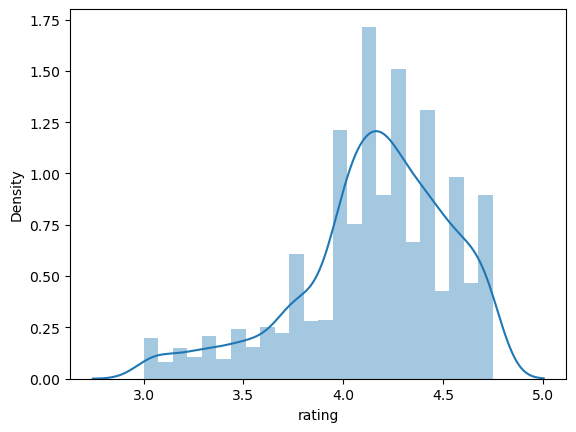

In [11]:
sns.distplot(df['rating'].dropna())

In [12]:
df['rating'].dropna().skew()

-0.8212053879173705

In [13]:
df['rating'].isnull().mean()*100

5.066530194472876

**Since null values in rating are MCAR and distribution is left skewed and only 5% values are missing so we will fill these with median of column**

**Processor_name**

In [16]:
df['processor_name'].nunique()

283

**As we have processor brand ,number of cores and processor speed then processor name is not useful so we will drop it .as this is not useful in future also**

**processor_speed**

In [19]:
df['processor_speed'].isnull().mean()*100

6.038894575230297

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\3314897061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['processor_speed'])


<Axes: xlabel='processor_speed', ylabel='Density'>

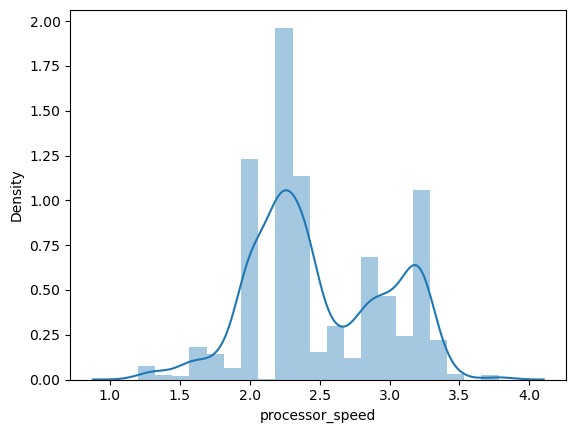

In [20]:
sns.distplot(df['processor_speed'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\1426273800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['processor_speed'].dropna())


<Axes: xlabel='processor_speed', ylabel='Density'>

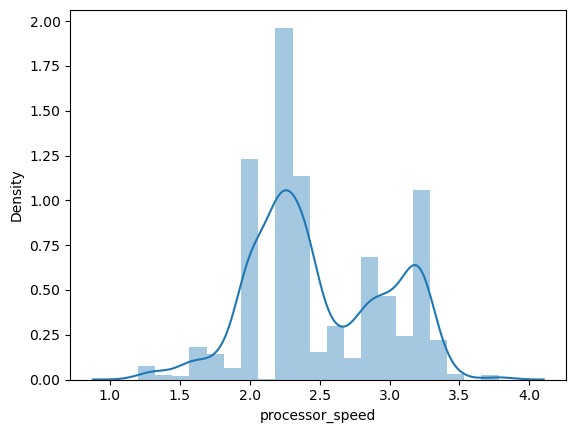

In [21]:
sns.distplot(df['processor_speed'].dropna())

In [22]:
df['processor_speed'].skew()

0.17840936280527447

In [23]:
df['processor_speed'].dropna().skew()

0.1784093628052745

**Here also situation is similiar to rating column and here it is sort of normal so we will use mean to fill null values**

**Battery Capacity**

In [26]:
df['battery_capacity'].isnull().mean()*100

0.7164790174002047

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2522680459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['battery_capacity'],hist=False)


<Axes: xlabel='battery_capacity', ylabel='Density'>

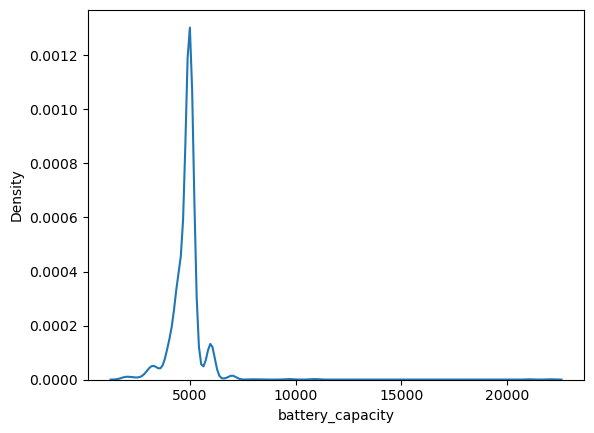

In [27]:
sns.distplot(df['battery_capacity'],hist=False)

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2890814999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['battery_capacity'].dropna(),hist=False)


<Axes: xlabel='battery_capacity', ylabel='Density'>

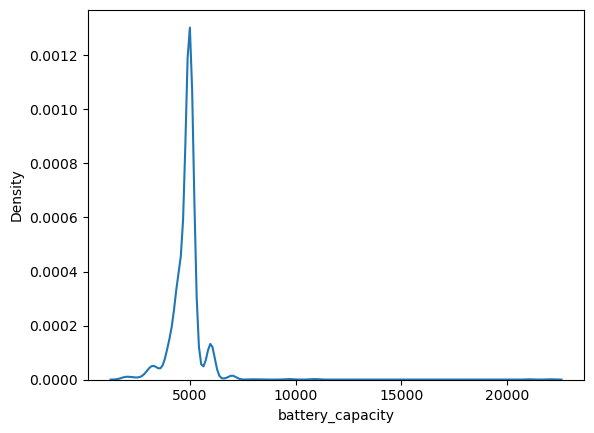

In [28]:
sns.distplot(df['battery_capacity'].dropna(),hist=False)

**Here we will use medain to fill null values**

In [30]:
df['fast_charging_capacity'].isnull().mean()*100

16.01842374616172

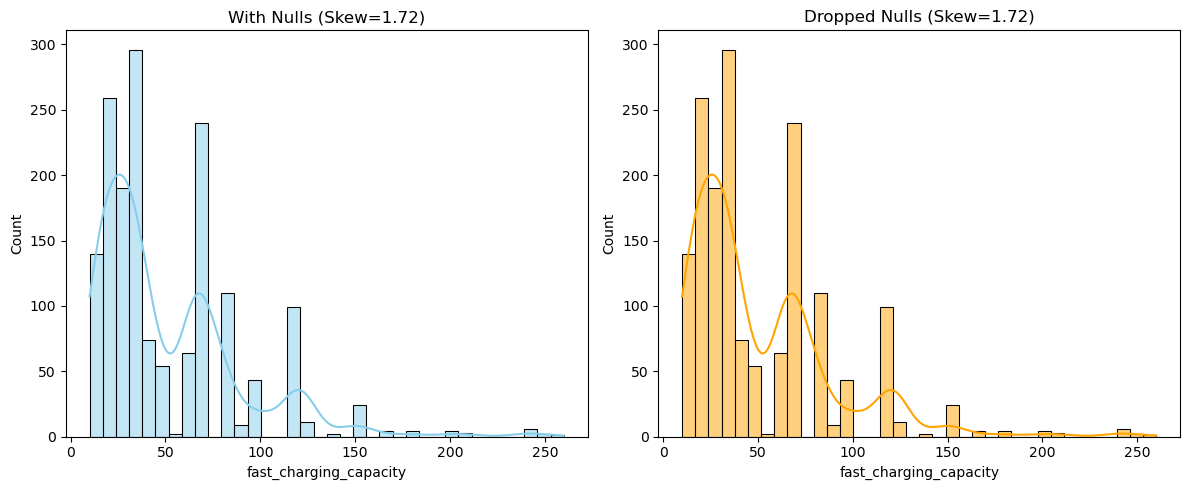

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Original column
col = 'fast_charging_capacity'

# Drop nulls for second plot
col_no_null = df[col].dropna()

# Calculate skewness
skew_original = df[col].skew(skipna=True)
skew_dropped = col_no_null.skew()

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution with nulls (pandas automatically ignores nulls)
sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f"With Nulls (Skew={skew_original:.2f})")

# Distribution after dropping nulls
sns.histplot(col_no_null, kde=True, ax=axes[1], color='orange')
axes[1].set_title(f"Dropped Nulls (Skew={skew_dropped:.2f})")

plt.tight_layout()
plt.show()


<Axes: ylabel='fast_charging_capacity'>

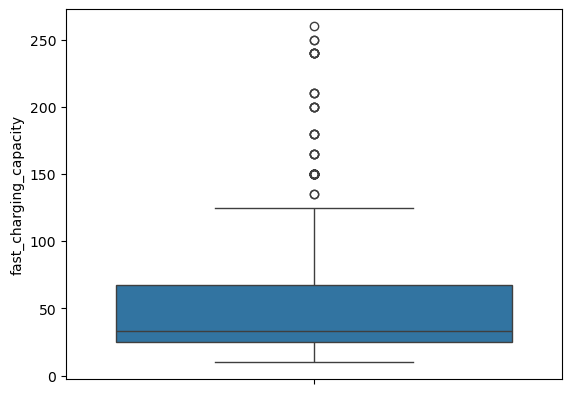

In [32]:
sns.boxplot(df['fast_charging_capacity'])

In [33]:
df['fast_charging_capacity'].nunique()

39

**“We will Impute fast_charging_capacity using random sampling to handle MCAR missing values while preserving distribution before quantile binning.”**

**refresh_rate**

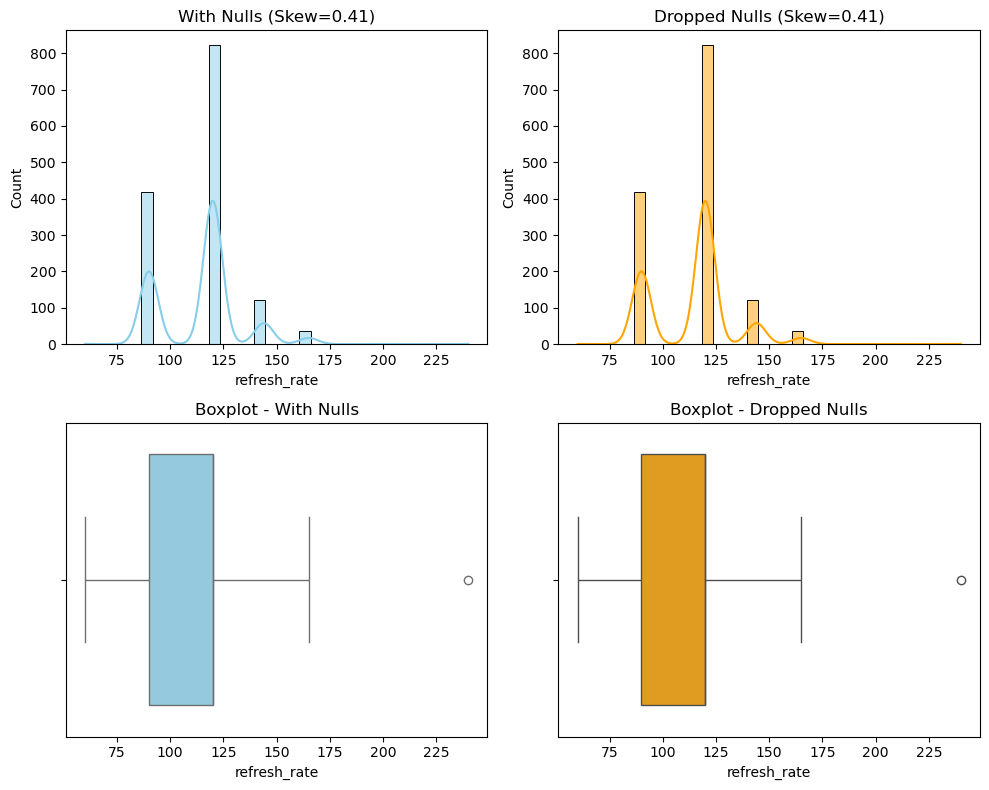

In [36]:
col = 'refresh_rate'
clean = df[col].dropna()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histograms
sns.histplot(df[col], kde=True, ax=axes[0,0], color='skyblue').set_title(f"With Nulls (Skew={df[col].skew(skipna=True):.2f})")
sns.histplot(clean, kde=True, ax=axes[0,1], color='orange').set_title(f"Dropped Nulls (Skew={clean.skew():.2f})")

# Boxplots
sns.boxplot(x=df[col], ax=axes[1,0], color='skyblue').set_title("Boxplot - With Nulls")
sns.boxplot(x=clean, ax=axes[1,1], color='orange').set_title("Boxplot - Dropped Nulls")

plt.tight_layout()
plt.show()


In [37]:
df['refresh_rate'].isnull().mean()*100

28.556806550665303

In [38]:
df['refresh_rate'].nunique()

6

In [39]:
df['refresh_rate'].value_counts()

refresh_rate
120.0    822
90.0     417
144.0    120
165.0     35
60.0       1
240.0      1
Name: count, dtype: int64

**We will use random sampling to fill null in above column**

**Extra_storage(GB)**

In [42]:
df['Extra_storage(GB)'].value_counts()

Extra_storage(GB)
1024.0    599
512.0     162
256.0     128
2048.0     40
128.0      16
32.0        6
64.0        3
1000.0      2
Name: count, dtype: int64

In [43]:
df['Extra_storage(GB)'].isnull().mean()*100

51.074718526100305

In [44]:
correlation = df['price'].corr(df['Extra_storage(GB)'])
print("Correlation:", correlation)


Correlation: 0.013240398546039266


For features with >50% missing and low correlation, it’s often better to drop or replace with a simpler indicator rather than impute heavily.so we will
drop it and use only extra_storage_supported(0/1) column in our model

In [46]:
df['os_version'].isnull().mean()*100

3.0194472876151486

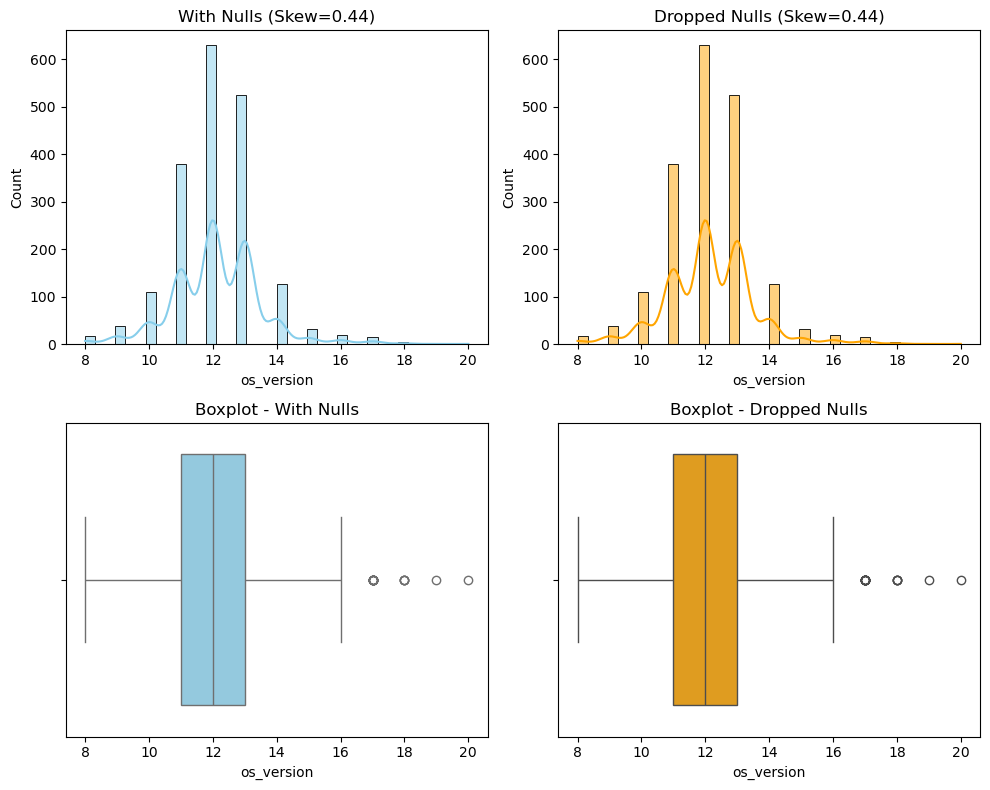

In [47]:
col = 'os_version'
clean = df[col].dropna()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histograms
sns.histplot(df[col], kde=True, ax=axes[0,0], color='skyblue').set_title(f"With Nulls (Skew={df[col].skew(skipna=True):.2f})")
sns.histplot(clean, kde=True, ax=axes[0,1], color='orange').set_title(f"Dropped Nulls (Skew={clean.skew():.2f})")

# Boxplots
sns.boxplot(x=df[col], ax=axes[1,0], color='skyblue').set_title("Boxplot - With Nulls")
sns.boxplot(x=clean, ax=axes[1,1], color='orange').set_title("Boxplot - Dropped Nulls")

plt.tight_layout()
plt.show()

since null values are MCAR and less than 5% so we will drop these rows

In [49]:
df['front_camera'].isnull().mean()*100

0.1023541453428864

we will drop null values in front_camera columns also 

In [51]:
# dropping the columns 
df.drop(columns=['processor_name','Extra_storage(GB)'],inplace =True)

In [52]:
df = df.dropna(subset=['front_camera','os_version'])

In [53]:
df.reset_index(inplace=True)

In [54]:
df.shape

(1893, 29)

In [55]:
#we will fill null values
df['rating'] = df['rating'].fillna(df['rating'].median())
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].median())
df['processor_speed'] = df['processor_speed'].fillna(df['processor_speed'].mean())

In [56]:
df.loc[df['refresh_rate'].isna(), 'refresh_rate'] = (
    df['refresh_rate'].dropna().sample(df['refresh_rate'].isna().sum(), replace=True).values
)

df.loc[df['fast_charging_capacity'].isna(), 'fast_charging_capacity'] = (
    df['fast_charging_capacity'].dropna().sample(df['fast_charging_capacity'].isna().sum(), replace=True).values
)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1893 non-null   int64  
 1   mobile_name              1893 non-null   object 
 2   brand                    1893 non-null   object 
 3   price                    1893 non-null   int64  
 4   rating                   1893 non-null   float64
 5   5g                       1893 non-null   bool   
 6   nfc                      1893 non-null   bool   
 7   ir_blaster               1893 non-null   bool   
 8   processor_brand          1893 non-null   object 
 9   num_cores                1893 non-null   int64  
 10  processor_speed          1893 non-null   float64
 11  ram                      1893 non-null   float64
 12  memory                   1893 non-null   float64
 13  battery_capacity         1893 non-null   float64
 14  fast_charging_capacity  

### Outlier Detection and Treatment + feature Transformation 

<Axes: xlabel='price'>

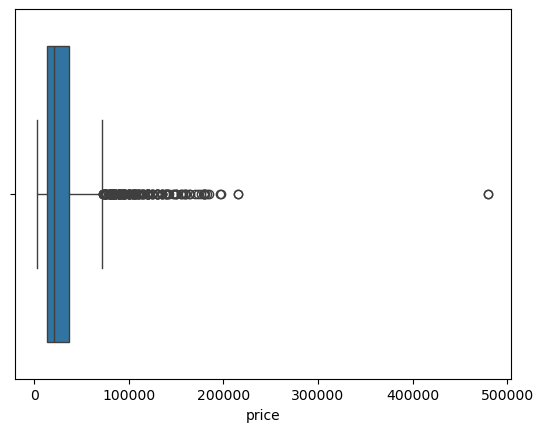

In [59]:
sns.boxplot(x=df['price'])

In [60]:
df[df['price']>200000]

,index,mobile_name,brand,price,rating,5g,nfc,ir_blaster,processor_brand,num_cores,processor_speed,ram,memory,battery_capacity,fast_charging_capacity,Fast_charging,screen_size,resolution_width,resolution_height,refresh_rate,Punch_Hole,Notch,primary_camera,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version
537,549,Xiaomi Redmi K20 Pro Signature Edition,xiaomi,480000,3.90,False,True,False,Snapdragon,8,2.80,8.0,256.0,4000.0,27.0,True,6.39,1080.0,2340.0,90.0,False,False,48.0,20,3,1,False,Android,9.0
795,820,Huawei Mate 30 RS Porsche Design,huawei,214990,4.15,True,True,True,Other,8,2.86,12.0,512.0,4500.0,25.0,True,6.53,1176.0,2400.0,120.0,False,False,40.0,32,4,2,True,Android,10.0
1807,1862,Xiaomi Redmi K20 Pro Signature Edition,xiaomi,480000,4.40,False,True,False,Snapdragon,8,2.80,8.0,256.0,4000.0,27.0,True,6.39,1080.0,2340.0,120.0,False,False,48.0,20,3,1,False,Android,9.0
1867,1926,Huawei Mate 30 RS Porsche Design,huawei,214990,4.20,True,True,True,Other,8,2.86,12.0,512.0,4500.0,60.0,True,6.53,1176.0,2400.0,90.0,False,False,40.0,32,4,2,True,Android,10.0


In [61]:
df =df[df['price']<200000]

In [62]:
df.shape

(1889, 29)

<Axes: xlabel='rating'>

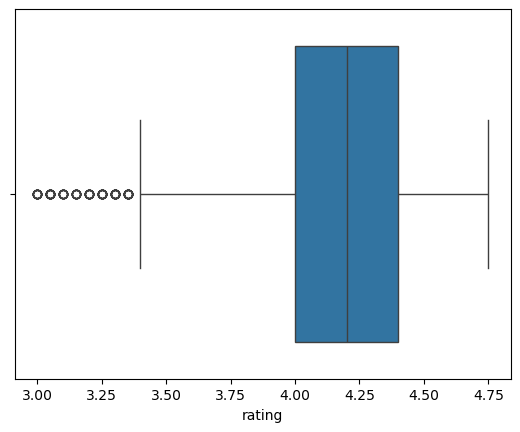

In [63]:
sns.boxplot(x=df['rating'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\1232834430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['rating'],hist=False)


<Axes: ylabel='Density'>

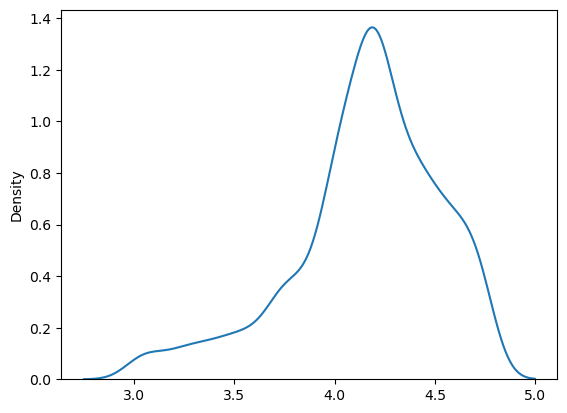

In [64]:
sns.distplot(x=df['rating'],hist=False)

we will use boxcox transformation to make it sort of normal

In [66]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
# Initialize Box-Cox transformer
pt = PowerTransformer(method='box-cox')
# Fit and transform
df['rating'] = pt.fit_transform(df[['rating']])

<Axes: xlabel='rating'>

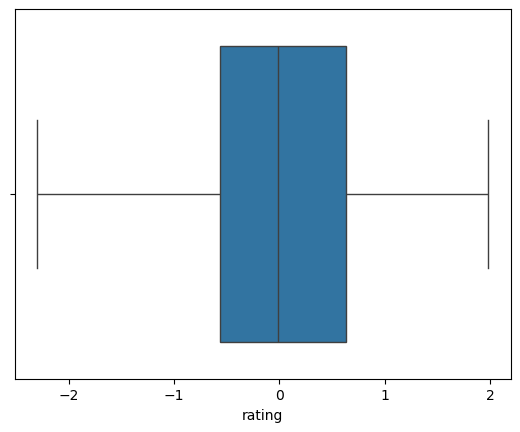

In [67]:
sns.boxplot(x=df['rating'])

In [68]:
df['processor_brand'].value_counts()

processor_brand
Snapdragon    775
Dimensity     430
Helio         332
Other         103
Exynos        102
Bionic         83
Unisoc         64
Name: count, dtype: int64

In [69]:
df['num_cores'].value_counts()

num_cores
8     1771
6       70
4       42
9        5
10       1
Name: count, dtype: int64

<Axes: ylabel='processor_speed'>

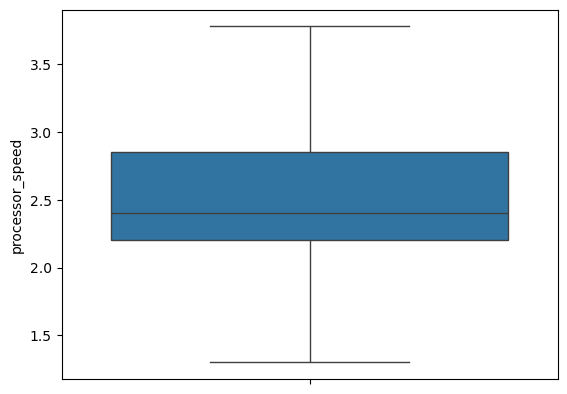

In [70]:
sns.boxplot(df['processor_speed'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\3314897061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['processor_speed'])


<Axes: xlabel='processor_speed', ylabel='Density'>

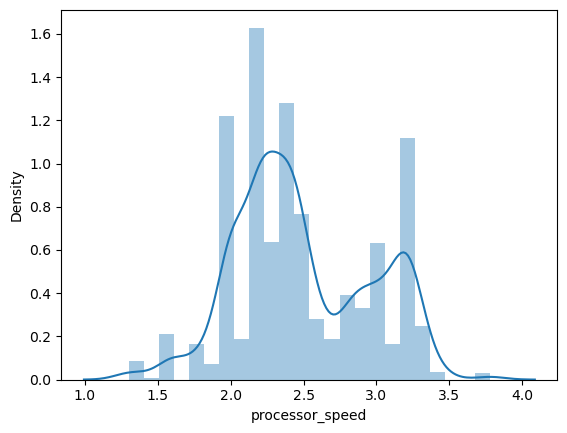

In [71]:
sns.distplot(df['processor_speed'])

In [72]:
df['ram'].value_counts()

ram
8.0     712
6.0     393
4.0     369
12.0    264
3.0      64
2.0      42
16.0     31
1.0       8
18.0      5
24.0      1
Name: count, dtype: int64

In [73]:
df['memory'].value_counts()

memory
128.0     971
256.0     462
64.0      303
32.0       77
512.0      51
16.0       13
1024.0     11
8.0         1
Name: count, dtype: int64

<Axes: ylabel='battery_capacity'>

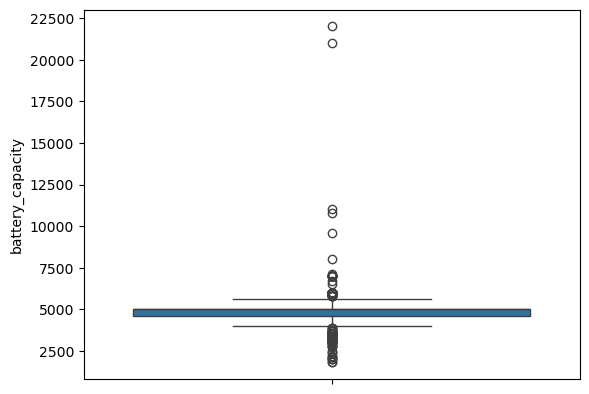

In [74]:
sns.boxplot(df['battery_capacity'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2134200553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['battery_capacity'])


<Axes: xlabel='battery_capacity', ylabel='Density'>

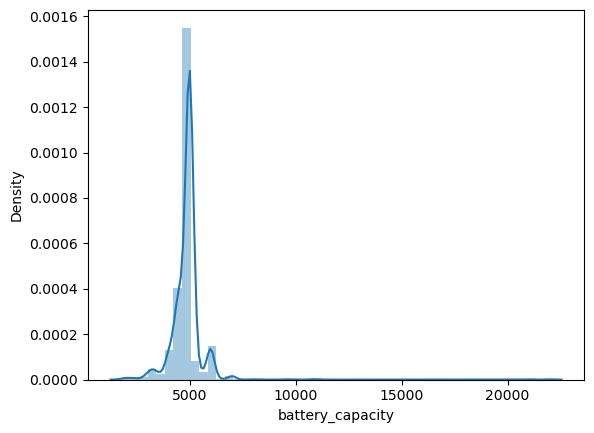

In [75]:
sns.distplot(df['battery_capacity'])

In [76]:
df['battery_capacity'].describe()

count     1889.000000
mean      4891.056114
std        821.324367
min       1821.000000
25%       4600.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

In [77]:
from sklearn.preprocessing import KBinsDiscretizer

# create transformer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# fit and transform
df['battery_capacity'] = est.fit_transform(df[['battery_capacity']])


C:\Users\USER07\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [78]:
print(est.bin_edges_[0])

[ 1821.  4500.  5000. 22000.]


In [79]:
df['battery_capacity'].value_counts()

battery_capacity
2.0    1295
1.0     330
0.0     264
Name: count, dtype: int64

<Axes: ylabel='fast_charging_capacity'>

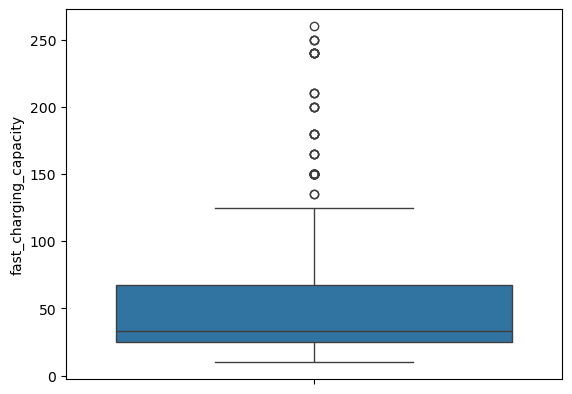

In [80]:
sns.boxplot(df['fast_charging_capacity'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\552284458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fast_charging_capacity'])


<Axes: xlabel='fast_charging_capacity', ylabel='Density'>

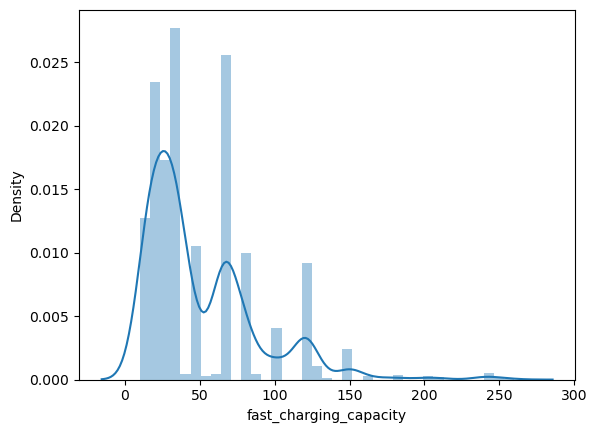

In [81]:
sns.distplot(df['fast_charging_capacity'])

In [82]:
from sklearn.preprocessing import KBinsDiscretizer

# create transformer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# fit and transform
df['fast_charging_capacity'] = est.fit_transform(df[['fast_charging_capacity']])

In [83]:
df.columns

Index(['index', 'mobile_name', 'brand', 'price', 'rating', '5g', 'nfc',
       'ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'ram',
       'memory', 'battery_capacity', 'fast_charging_capacity', 'Fast_charging',
       'screen_size', 'resolution_width', 'resolution_height', 'refresh_rate',
       'Punch_Hole', 'Notch', 'primary_camera', 'front_camera',
       'num_rear_camera', 'num_front_camera', 'Extra_storage_supported',
       'os_name', 'os_version'],
      dtype='object')

In [84]:
df1=df.copy()

<Axes: ylabel='screen_size'>

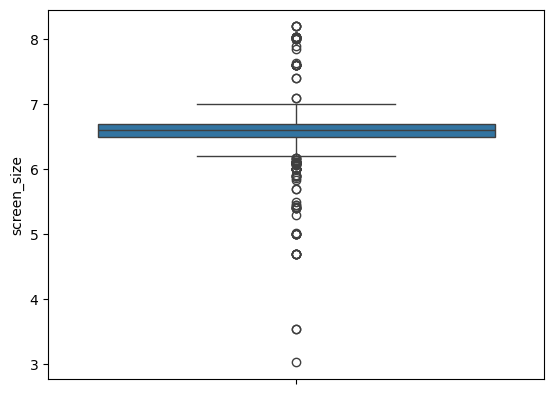

In [85]:
sns.boxplot(df['screen_size'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\56902666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screen_size'])


<Axes: xlabel='screen_size', ylabel='Density'>

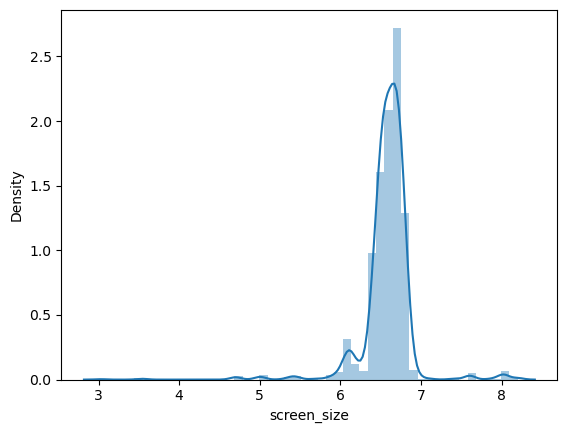

In [86]:
sns.distplot(df['screen_size'])

In [87]:
from sklearn.preprocessing import KBinsDiscretizer

# create transformer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# fit and transform
df['screen_size'] = est.fit_transform(df[['screen_size']])

In [88]:
df['screen_size'].describe()

count    1889.000000
mean        1.112229
std         0.869750
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: screen_size, dtype: float64

<Axes: ylabel='resolution_height'>

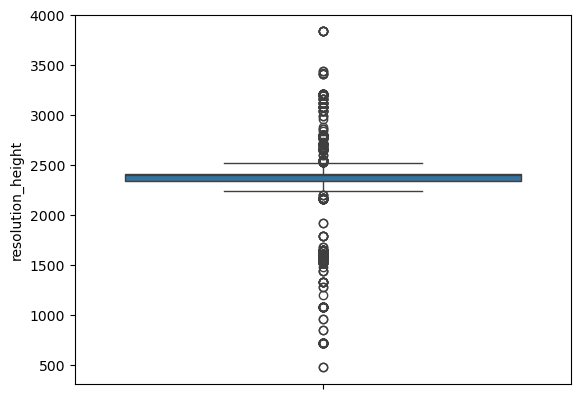

In [89]:
sns.boxplot(df['resolution_height'])

In [90]:
df['resolution_width'].describe()

count    1889.000000
mean     1086.742721
std       274.253798
min       480.000000
25%      1080.000000
50%      1080.000000
75%      1080.000000
max      2460.000000
Name: resolution_width, dtype: float64

In [91]:
from sklearn.preprocessing import KBinsDiscretizer

# create transformer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# fit and transform
df['resolution_width'] = est.fit_transform(df[['resolution_width']])

C:\Users\USER07\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [92]:
from sklearn.preprocessing import KBinsDiscretizer

# create transformer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# fit and transform
df['resolution_height'] = est.fit_transform(df[['resolution_height']])

C:\Users\USER07\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


<Axes: ylabel='refresh_rate'>

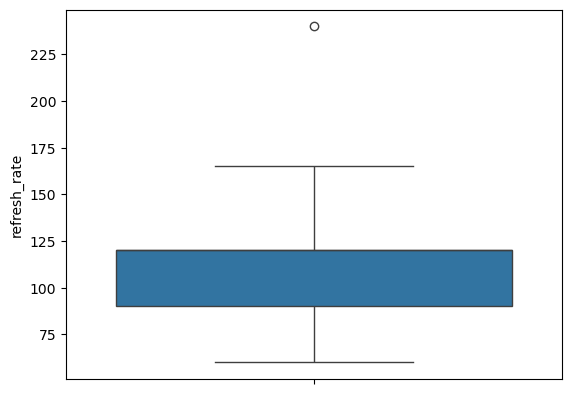

In [93]:
sns.boxplot(df['refresh_rate'])

<Axes: ylabel='primary_camera'>

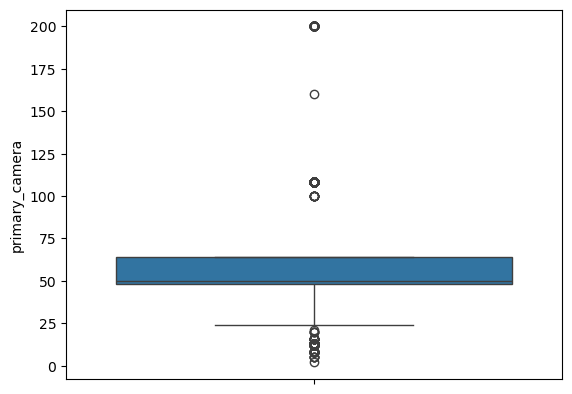

In [94]:
sns.boxplot(df['primary_camera'])

In [95]:
df['primary_camera'].describe()

count    1889.000000
mean       56.833722
std        37.460562
min         2.000000
25%        48.000000
50%        50.000000
75%        64.000000
max       200.000000
Name: primary_camera, dtype: float64

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\2929474405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['primary_camera'])


<Axes: xlabel='primary_camera', ylabel='Density'>

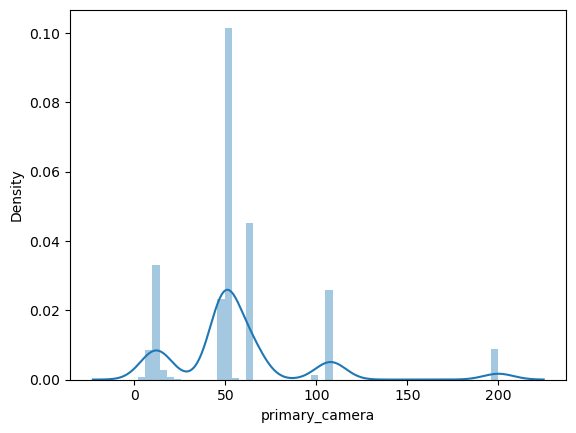

In [96]:
sns.distplot(df['primary_camera'])

<Axes: ylabel='front_camera'>

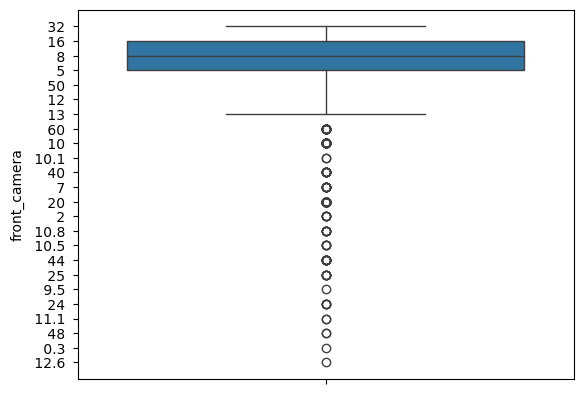

In [97]:
sns.boxplot(df['front_camera'])

C:\Users\USER07\AppData\Local\Temp\ipykernel_8824\703194104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['front_camera'])


<Axes: xlabel='front_camera', ylabel='Density'>

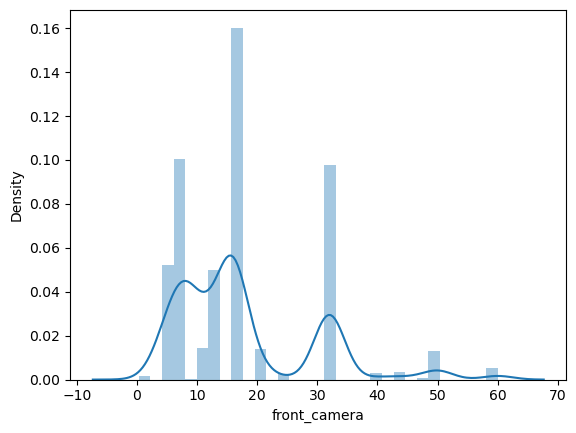

In [98]:
sns.distplot(df['front_camera'])

In [99]:
df['front_camera'].value_counts()

front_camera
16       583
32       356
8        356
5        190
12       100
13        81
20        51
50        48
10        39
60        20
44        12
40        11
7          9
10.8       6
25         5
2          5
24         4
10.5       4
10.1       2
11.1       2
48         2
9.5        1
0.3        1
12.6       1
Name: count, dtype: int64

In [100]:
from sklearn.preprocessing import KBinsDiscretizer

# define transformer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

# fit & transform
df[['primary_camera', 'front_camera']] = est.fit_transform(df[['primary_camera', 'front_camera']])


C:\Users\USER07\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [101]:
df['num_rear_camera'].value_counts()

num_rear_camera
3    1067
2     514
4     227
1      81
Name: count, dtype: int64

In [102]:
df['num_front_camera'].value_counts()

num_front_camera
1    1839
2      50
Name: count, dtype: int64

#### Encoding the Features

In [104]:
df=df.drop(columns=['index','mobile_name'])

In [197]:
df.head()

,brand,price,rating,5g,nfc,ir_blaster,processor_brand,num_cores,processor_speed,ram,memory,battery_capacity,fast_charging_capacity,Fast_charging,screen_size,resolution_width,resolution_height,refresh_rate,Punch_Hole,Notch,primary_camera,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version
0,14,29990,1.769613,1,1,1,1,8,3.10,8.0,256.0,1.0,3.0,1,2.0,1.0,2.0,120.0,1,0,0.0,2.0,3,1,0,0,14.0
1,16,19999,0.983402,1,1,1,1,8,3.35,12.0,256.0,2.0,4.0,1,2.0,2.0,3.0,120.0,1,0,1.0,1.0,3,1,0,0,14.0
2,22,31999,0.460101,1,1,1,1,8,2.80,8.0,256.0,2.0,4.0,1,2.0,2.0,3.0,120.0,1,0,3.0,1.0,3,1,0,0,13.0
3,14,40990,1.982945,1,1,1,1,8,3.10,12.0,256.0,1.0,4.0,1,2.0,2.0,3.0,120.0,1,0,0.0,2.0,3,1,0,0,14.0
4,22,33999,-0.562703,1,1,1,5,8,2.40,12.0,256.0,2.0,4.0,1,2.0,2.0,3.0,144.0,1,0,3.0,2.0,3,1,0,0,13.0


In [106]:
# convert all bool columns to 0/1
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [107]:
from sklearn.preprocessing import LabelEncoder
df[['brand','processor_brand','os_name']] = df[['brand','processor_brand','os_name']].apply(LabelEncoder().fit_transform)


In [199]:
df.head()

,brand,price,rating,5g,nfc,ir_blaster,processor_brand,num_cores,processor_speed,ram,memory,battery_capacity,fast_charging_capacity,Fast_charging,screen_size,resolution_width,resolution_height,refresh_rate,Punch_Hole,Notch,primary_camera,front_camera,num_rear_camera,num_front_camera,Extra_storage_supported,os_name,os_version
0,14,29990,1.769613,1,1,1,1,8,3.10,8.0,256.0,1.0,3.0,1,2.0,1.0,2.0,120.0,1,0,0.0,2.0,3,1,0,0,14.0
1,16,19999,0.983402,1,1,1,1,8,3.35,12.0,256.0,2.0,4.0,1,2.0,2.0,3.0,120.0,1,0,1.0,1.0,3,1,0,0,14.0
2,22,31999,0.460101,1,1,1,1,8,2.80,8.0,256.0,2.0,4.0,1,2.0,2.0,3.0,120.0,1,0,3.0,1.0,3,1,0,0,13.0
3,14,40990,1.982945,1,1,1,1,8,3.10,12.0,256.0,1.0,4.0,1,2.0,2.0,3.0,120.0,1,0,0.0,2.0,3,1,0,0,14.0
4,22,33999,-0.562703,1,1,1,5,8,2.40,12.0,256.0,2.0,4.0,1,2.0,2.0,3.0,144.0,1,0,3.0,2.0,3,1,0,0,13.0


### Training LinearRegression

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

# Separate features and target
X1 = df.drop("price", axis=1)
y1 = df["price"]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Train Linear Regression
model = LinearRegression()
model.fit(X_scaled, y1)

# Predictions
y_pred = model.predict(X_scaled)

# R² Score
r2 = r2_score(y1, y_pred)

# Adjusted R² Score
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of features
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")


R² Score: 0.7424
Adjusted R² Score: 0.7388


#### Training Different Tree Based Models

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Adjusted R2
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1)/(n - p - 1)


In [205]:
from sklearn.tree import DecisionTreeRegressor

# Train
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

print("Decision Tree RMSE:", rmse)
print("Decision Tree R2:", r2)
print("Decision Tree Adjusted R2:", adj_r2)


Decision Tree RMSE: 14286.837027626803
Decision Tree R2: 0.7856152208514597
Decision Tree Adjusted R2: 0.7697348668404568


In [206]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

print("Random Forest RMSE:", rmse)
print("Random Forest R2:", r2)
print("Random Forest Adjusted R2:", adj_r2)


Random Forest RMSE: 10092.579329739076
Random Forest R2: 0.8930142069617214
Random Forest Adjusted R2: 0.8850893334033304


In [207]:
from sklearn.ensemble import GradientBoostingRegressor

# Train
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting R2:", r2)
print("Gradient Boosting Adjusted R2:", adj_r2)


Gradient Boosting RMSE: 9882.079702155537
Gradient Boosting R2: 0.89743044499085
Gradient Boosting Adjusted R2: 0.8898327001753574


### Perfomance on training data

In [208]:
from xgboost import XGBRegressor

# Train
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_train)

# Metrics
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
adj_r2 = adjusted_r2(r2, X_train.shape[0], X_train.shape[1])

print("XGBoost RMSE:", rmse)
print("XGBoost R2:", r2)
print("XGBoost Adjusted R2:", adj_r2)


XGBoost RMSE: 2207.3857921432655
XGBoost R2: 0.9944445985070374
XGBoost Adjusted R2: 0.9943472666749504


**With cross validation**

### Hypertuning our XGB model to see whether perfomance improves or not

In [211]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define base model
xgb_base = XGBRegressor(random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.46, 0.3],
    'max_depth': [3, 5,7,9]
}

# RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    scoring=rmse_scorer,
    n_iter=30,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

print("Best Parameters:", random_search.best_params_)
print("RandomSearch RMSE:", rmse)
print("RandomSearch R²:", r2)
print("RandomSearch Adjusted R²:", adj_r2)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
RandomSearch RMSE: 9650.631392477295
RandomSearch R²: 0.9021787467029037
RandomSearch Adjusted R²: 0.8949327279401558


In [212]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define your model
xgb_base = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

print("Best Parameters:", grid_search.best_params_)
print("GridSearch RMSE:", rmse)
print("GridSearch R²:", r2)
print("GridSearch Adjusted R²:", adj_r2)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
GridSearch RMSE: 8415.69541667071
GridSearch R²: 0.9256121880120487
GridSearch Adjusted R²: 0.9201019797166449


#### Conclusion 
**We can see improvement in perfomance of XGBoost model after GridSearchCV so we will finalize that model.**

#### final result

XGBoost RMSE: 8415.69541667071

XGBoost R2: 0.9256121880120487

XGBoost Adjusted R2:  0.9201019797166449